In [2]:
from collections import namedtuple

PlayerEntry = namedtuple('PlayerEntry', 'timestamp playerid')

In [3]:
from uuid import uuid4
from datetime import datetime, timedelta

PlayerEntry(datetime.now(), uuid4().hex)

PlayerEntry(timestamp=datetime.datetime(2020, 6, 15, 21, 51, 35, 96892), playerid='9af58b65d1204f36954758a015779b5d')

In [4]:
from random import randrange

def create_rand_entry(start_time, end_time):
    dtime = end_time - start_time
    rtime = randrange(0, dtime.seconds)
    timestamp = start_time + timedelta(seconds=rtime)
    playerid = uuid4().hex
    return PlayerEntry(timestamp, playerid)

stime = datetime.now()
etime = stime + timedelta(hours=1)

create_rand_entry(stime, etime)

PlayerEntry(timestamp=datetime.datetime(2020, 6, 15, 22, 3, 9, 658110), playerid='a905d12463dc422885609c66006dfecf')

In [5]:
from queue import PriorityQueue

total_entries = 1000
player_queue = PriorityQueue(0)

for i in range(total_entries):
    e = create_rand_entry(stime, etime)
    player_queue.put(e)

In [6]:
matched = list()

while not player_queue.empty():
    if player_queue.qsize() < 2:
        break
    p1 = player_queue.get()
    p2 = player_queue.get()
    matched.append((p1, p2))

In [7]:
wait_times = [(p2.timestamp - p1.timestamp).seconds for p1, p2 in matched]

max(wait_times)

28

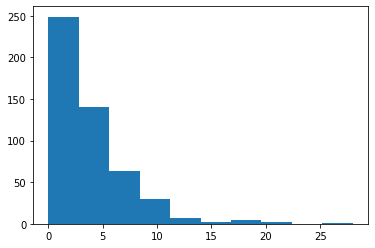

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(wait_times)

plt.show()